# Dropout

In [37]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.utils import normalize, to_categorical

from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [38]:
# recuper il dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

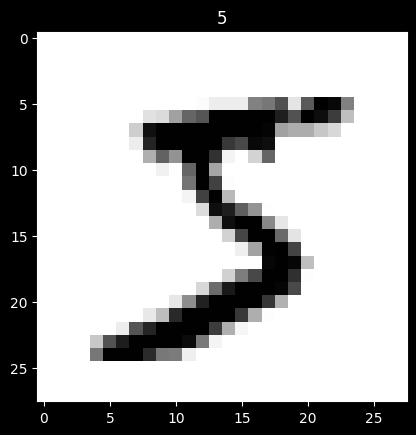

In [4]:
# visualizzazione del primo esempio
plt.imshow(X_train[0], cmap='binary') #colormap binary (bianco e nero)
plt.title(y_train[0])
plt.show()

In [39]:
# preprocessing
print(X_train[0][14])
print(y_train[0])
print('\n------------\n')

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train[0][14])
print('-------')
print(y_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119
  25   0   0   0   0   0   0   0   0   0]
5

------------

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10498298 0.34940902 0.3689874  0.34978968 0.15370495
 0.04089933 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
-------
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# modello senza dropout
model_without_dropout = Sequential()
model_without_dropout.add(Flatten(input_shape=(28, 28)))
model_without_dropout.add(Dense(512))
model_without_dropout.add(Activation('relu'))
model_without_dropout.add(Dense(512))
model_without_dropout.add(Activation('relu'))
model_without_dropout.add(Dense(10))
model_without_dropout.add(Activation('softmax'))

model_without_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_without_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [7]:
history_without_dropout = model_without_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 [==============================] - 20s 11ms/step - loss: 0.2128 - accuracy: 0.9356 - val_loss: 0.1127 - val_accuracy: 0.9690
Epoch 2/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0860 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9747
Epoch 3/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0585 - accuracy: 0.9809 - val_loss: 0.0835 - val_accuracy: 0.9767
Epoch 4/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.0779 - val_accuracy: 0.9767
Epoch 5/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0321 - accuracy: 0.9893 - val_loss: 0.0817 - val_accuracy: 0.9788
Epoch 6/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0244 - accuracy: 0.9918 - val_loss: 0.0893 - val_accuracy: 0.9793
Epoch 7/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.1006 -

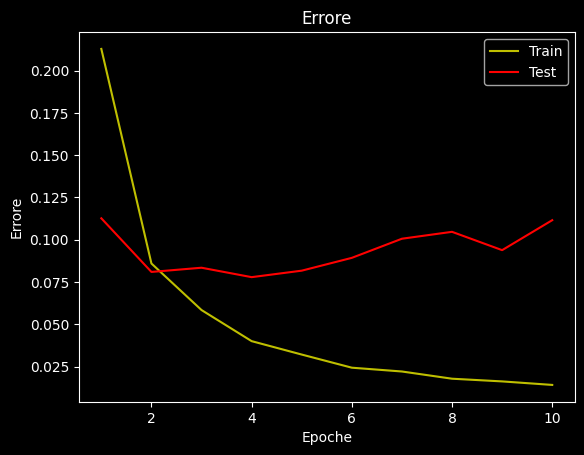

In [8]:
# tracciamo i grafici
loss = history_without_dropout.history['loss']
val_loss = history_without_dropout.history['val_loss']

epochs = range(1, len(loss) + 1) #estremo destra non compreso

plt.plot(epochs, loss, 'y', label='Train')
plt.plot(epochs, val_loss, 'r', label='Test')
plt.title('Errore')
plt.xlabel('Epoche')
plt.ylabel('Errore')
plt.legend()
plt.show()

Osservando gli errori nella fase di train e di test, vadiamo subito che hanno andamenti molto diversi. Questo è un'indicatore di Overfitting. Infatti si nota che il modello ha un comporatmento in fase di train che è diverso dal comportamento in fase di test (sui dati di test).

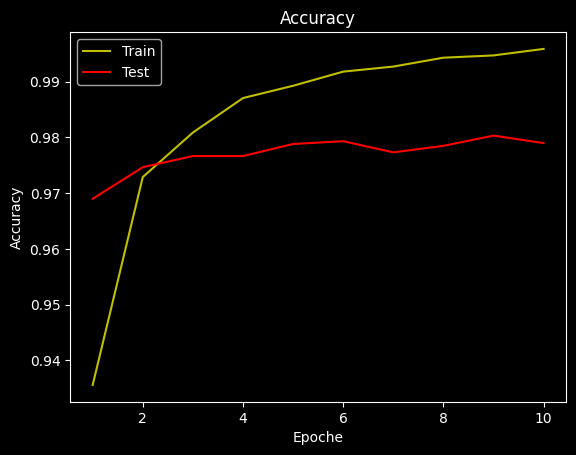

In [9]:
accuracy = history_without_dropout.history['accuracy']
val_accuracy = history_without_dropout.history['val_accuracy']

epochs = range(1, len(loss) + 1) #estremo destra non compreso

plt.plot(epochs, accuracy, 'y', label='Train')
plt.plot(epochs, val_accuracy, 'r', label='Test')
plt.title('Accuracy')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
from typing import no_type_check_decorator
# abbiamo visto che c'è la presenza di overfitting nel modello
# stampiamo comunque la valuatazione

no_dropout_test_loss, no_dropout_test_accuracy = model_without_dropout.evaluate(X_test, y_test)

print('Senza dropout, accuratezza nei dati di test = ', no_dropout_test_accuracy * 100, '%')

313/313 [==============================] - 2s 5ms/step - loss: 0.1177 - accuracy: 0.9757
Senza dropout, accuratezza nei dati di test =  97.57000207901001 %


In [40]:
# facciamo lo stesso modello di prima ma con dropout
model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28)))
model_dropout.add(Dense(512))
# aggiungiamo la probabilità del 50% per ogni neurone di essere presente nella rete
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(512))
# aggiungiamo il dropout
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))

model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer = 'Adam',
    metrics=['accuracy']
)

model_dropout.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 activation_15 (Activation)  (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 activation_16 (Activation)  (None, 512)              

In [41]:
# l'addestramento sarà più veloce poichè abbiamo meno parametri da addestrare
from keras.callbacks import CSVLogger

# Set up the logger before initiating training
csv_logger = CSVLogger('training.log', separator=',', append=False)

history_dropout= model_dropout.fit(
    X_train,
    y_train,
    callbacks=[csv_logger],
    batch_size=32,
    epochs=20,
    validation_split = 0.1,
    verbose=1
)

model_dropout.save('model_dropout.keras')

Epoch 1/20
1688/1688 [==============================] - 22s 13ms/step - loss: 0.3265 - accuracy: 0.9005 - val_loss: 0.1050 - val_accuracy: 0.9717
Epoch 2/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.1721 - accuracy: 0.9475 - val_loss: 0.0888 - val_accuracy: 0.9738
Epoch 3/20
1688/1688 [==============================] - 23s 14ms/step - loss: 0.1374 - accuracy: 0.9584 - val_loss: 0.0816 - val_accuracy: 0.9768
Epoch 4/20
1688/1688 [==============================] - 30s 18ms/step - loss: 0.1170 - accuracy: 0.9650 - val_loss: 0.0727 - val_accuracy: 0.9782
Epoch 5/20
1688/1688 [==============================] - 21s 12ms/step - loss: 0.1072 - accuracy: 0.9676 - val_loss: 0.0778 - val_accuracy: 0.9778
Epoch 6/20
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0996 - accuracy: 0.9694 - val_loss: 0.0754 - val_accuracy: 0.9782
Epoch 7/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0898 - accuracy: 0.9726 - val_loss: 0.0651 -

In [42]:
# tracciamo i grafici
import pandas as pd
log_data = pd.read_csv('training.log', sep=',', engine='python')

log_data.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.900481,0.326453,0.971667,0.104995
1,1,0.947481,0.172070,0.973833,0.088798
2,2,0.958444,0.137419,0.976833,0.081632
3,3,0.964981,0.117022,0.978167,0.072744
4,4,0.967630,0.107206,0.977833,0.077760


Vediamo che sia in fase di train che di test abbiamo un andamento simile dell'errore e con valori molto più vicini rispetto a prima. Questo indica che l'overfitting è scomparso.

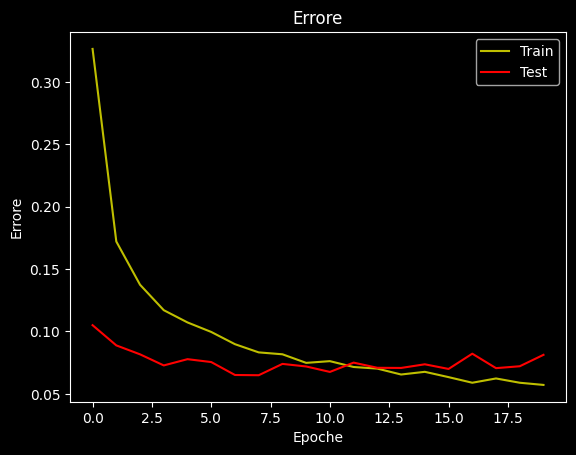

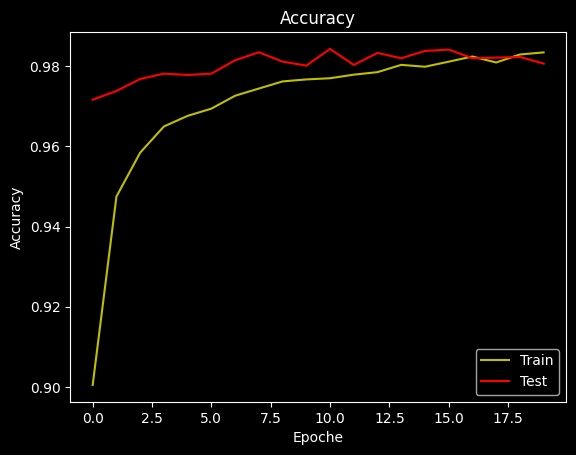

In [43]:
loss = log_data['loss']
val_loss = log_data['val_loss']

epochs = log_data['epoch']

plt.plot(epochs, loss, 'y', label='Train')
plt.plot(epochs, val_loss, 'r', label='Test')
plt.title('Errore')
plt.xlabel('Epoche')
plt.ylabel('Errore')
plt.legend()
plt.show()

accuracy = log_data['accuracy']
val_accuracy = log_data['val_accuracy']


plt.plot(epochs, accuracy, 'y', label='Train')
plt.plot(epochs, val_accuracy, 'r', label='Test')
plt.title('Accuracy')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
test_loss, test_accuracy = model_dropout.evaluate(X_test, y_test)

print('Con Dropout, accuratezza nei dati di test = ', test_accuracy * 100, '%')
print('Senza Dropout, accuratezza nei dati di test = ', no_dropout_test_accuracy * 100, '%')

313/313 [==============================] - 2s 7ms/step - loss: 0.0921 - accuracy: 0.9792
Con Dropout, accuratezza nei dati di test =  97.9200005531311 %
Senza Dropout, accuratezza nei dati di test =  97.57000207901001 %
